### お試しで予測

    - 簡単のため，application_train.csvのデータだけで，学習：テスト＝8:2として予測してみる

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)  # jupyter notebook上で表示カラム数が省略されるのを防ぐ
from IPython.display import display

In [4]:
application_train = pd.read_csv('data/application_train.csv', dtype='object')
print(application_train.shape)
application_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08303696739132256,0.2629485927471776,0.13937578009978951,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003540999999999999,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3112673113812225,0.6222457752555098,NaN,0.0959,0.0529,0.9851,0.7959999999999999,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559120833904428,0.7295666907060153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
# 数値データの処理

# カラム名が，　'CNT', 'AMT', 'HOURS', 'DAYS', 'YEARS', 'AVG', 'MEDI', 'EXT_SOURCE'を含むものは数値型に変換
# それ以外は，　カテゴリ値と見なし，　one-hot表現に変換

cols_num = list(application_train.columns[application_train.columns.str.contains('CNT')]) \
            + list(application_train.columns[application_train.columns.str.contains('AMT')]) \
            + list(application_train.columns[application_train.columns.str.contains('HOUR')]) \
            + list(application_train.columns[application_train.columns.str.contains('DAYS')]) \
            + list(application_train.columns[application_train.columns.str.contains('YEARS')]) \
            + list(application_train.columns[application_train.columns.str.contains('POPULATION')]) \
            + list(application_train.columns[application_train.columns.str.contains('AGE')]) \
            + list(application_train.columns[application_train.columns.str.contains('AVG')]) \
            + list(application_train.columns[application_train.columns.str.contains('MEDI')]) \
            + list(application_train.columns[application_train.columns.str.contains('EXT_SOURCE')])

#print(cols_num)

# MODEを含むやつがいくつか数値でないものも混じっているので，一旦確認
display(application_train[application_train.columns[application_train.columns.str.contains('MODE')]])
cols_str_MODE = ['FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
cols_MODE = [col for col in application_train.columns[application_train.columns.str.contains('MODE')] if col not in cols_str_MODE]

cols_num = cols_num + cols_MODE


df_train_num = application_train[cols_num+['SK_ID_CURR']]
df_train_num = df_train_num.set_index('SK_ID_CURR')
df_train_num = df_train_num.astype('float64')
display(df_train_num.head())

# 簡単のため，　　欠損は全部平均値で補完
# 下記だと，　欠損値補完が出来ない．．．．なぜ？？
#df_train_num = df_train_num.fillna(df_train_num.mean())
df_train_num = df_train_num.fillna(0)
#print('欠損の数：\n{}'.format(display(df_train_num.isnull().sum())))
display(df_train_num.head())

,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No
1,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,reg oper account,block of flats,0.0714,Block,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,CNT_CHILDREN,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,TOTALAREA_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.0,1.0,2.0,2.0,2.0,2.0,202500.0,406597.5,24700.5,351000.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,-9461.0,-637.0,-3648.0,-2120.0,-1134.0,0.9722,0.6192,0.9722,0.6341,0.9722,0.6243,0.018801,NaN,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.083037,0.262949,0.139376,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0149
100003,0.0,2.0,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,-16765.0,-1188.0,-1186.0,-291.0,-828.0,0.9851,0.7960,0.9851,0.8040,0.9851,0.7987,0.003541,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.311267,0.622246,NaN,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0714
100004,0.0,1.0,0.0,0.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,-19046.0,-225.0,-4260.0,-2531.0,-815.0,NaN,NaN,NaN,NaN,NaN,NaN,0.010032,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,0.0,2.0,2.0,0.0,2.0,0.0,135000.0,312682.5,29686.5,297000.0,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,-19005.0,-3039.0,-9833.0,-2437.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0.008019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,0.0,1.0,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,-19932.0,-3038.0,-4311.0,-3458.0,-1106.0,NaN,NaN,NaN,NaN,NaN,NaN,0.028663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,CNT_CHILDREN,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,TOTALAREA_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.0,1.0,2.0,2.0,2.0,2.0,202500.0,406597.5,24700.5,351000.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,-9461.0,-637.0,-3648.0,-2120.0,-1134.0,0.9722,0.6192,0.9722,0.6341,0.9722,0.6243,0.018801,0.0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.083037,0.262949,0.139376,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0149
100003,0.0,2.0,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,-16765.0,-1188.0,-1186.0,-291.0,-828.0,0.9851,0.7960,0.9851,0.8040,0.9851,0.7987,0.003541,0.0,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.311267,0.622246,0.000000,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0714
100004,0.0,1.0,0.0,0.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,-19046.0,-225.0,-4260.0,-2531.0,-815.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.010032,26.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.000000,0.555912,0.729567,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0000
100006,0.0,2.0,2.0,0.0,2.0,0.0,135000.0,312682.5,29686.5,297000.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,-19005.0,-3039.0,-9833.0,-2437.0,-617.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.008019,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.000000,0.650442,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0000
100007,0.0,1.0,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,-19932.0,-3038.0,-4311.0,-3458.0,-1106.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.028663,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.000000,0.322738,0.000000,0.0000,0.0000,0.00

In [6]:
# カテゴリカルデータ
df_train_cat = application_train[[col for col in application_train.columns if col not in cols_num+['TARGET']]]
df_train_cat = df_train_cat.set_index('SK_ID_CURR')
print('カテゴリカルデータのデータ種類数： \n{}'.format(df_train_cat.nunique()))

# 種類が100以上のものは除く
#df_train_cat = df_train_cat[df_train_cat.columns[df_train_cat.nunique()<100]]

# カテゴリカルデータは，　one-hot表現に
df_train_cat = pd.get_dummies(df_train_cat)  # NaNの場合は，　　値がないことになり, 新たなカラムは生成されず，　　全て0の値を持つレコードとなる
display(df_train_cat.head())

カテゴリカルデータのデータ種類数： 
NAME_CONTRACT_TYPE              2
CODE_GENDER                     3
FLAG_OWN_CAR                    2
FLAG_OWN_REALTY                 2
NAME_TYPE_SUITE                 7
NAME_INCOME_TYPE                8
NAME_EDUCATION_TYPE             5
NAME_FAMILY_STATUS              6
NAME_HOUSING_TYPE               6
FLAG_MOBIL                      2
FLAG_EMP_PHONE                  2
FLAG_WORK_PHONE                 2
FLAG_CONT_MOBILE                2
FLAG_PHONE                      2
FLAG_EMAIL                      2
OCCUPATION_TYPE                18
REGION_RATING_CLIENT            3
REGION_RATING_CLIENT_W_CITY     3
WEEKDAY_APPR_PROCESS_START      7
REG_REGION_NOT_LIVE_REGION      2
REG_REGION_NOT_WORK_REGION      2
LIVE_REGION_NOT_WORK_REGION     2
REG_CITY_NOT_LIVE_CITY          2
REG_CITY_NOT_WORK_CITY          2
LIVE_CITY_NOT_WORK_CITY         2
ORGANIZATION_TYPE              58
FONDKAPREMONT_MODE              4
HOUSETYPE_MODE                  3
WALLSMATERIAL_MODE           

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_MOBIL_0,FLAG_MOBIL_1,FLAG_EMP_PHONE_0,FLAG_EMP_PHONE_1,FLAG_WORK_PHONE_0,FLAG_WORK_PHONE_1,FLAG_CONT_MOBILE_0,FLAG_CONT_MOBILE_1,FLAG_PHONE_0,FLAG_PHONE_1,FLAG_EMAIL_0,FLAG_EMAIL_1,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_REGION_NOT_LIVE_REGION_0,REG_REGION_NOT_LIVE_REGION_1,REG_REGION_NOT_WORK_REGION_0,REG_REGION_NOT_WORK_REGION_1,LIVE_REGION_NOT_WORK_REGION_0,LIVE_REGION_NOT_WORK_REGION_1,REG_CITY_NOT_LIVE_CITY_0,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_0,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_0,LIVE_CITY_NOT_WORK_CITY_1,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,...,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGA

In [7]:
# 数値データと，　カテゴリデータを結合
df_train = pd.concat([df_train_num, df_train_cat], axis=1)
display(df_train.head())
#print('欠損の数：\n{}'.format(display(df_train.isnull().sum())))


# TARGET変数と結合して，　IDを紐づけておく
target = application_train[['TARGET', 'SK_ID_CURR']]
target = target.set_index('SK_ID_CURR')

df_train = pd.concat([df_train, target], axis=1)
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1].astype('int')
print('TARGET: 0 : 1 = %d : %d'%(len(y[y==0]), len(y[y==1])))

,CNT_CHILDREN,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,TOTALAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,...,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_DOCUMENT_2_0,FLAG_DOCUMENT_2_1,FLAG_DOCUMENT_3_0,FLAG_DOCUMENT_3_1,FLAG_DOCUMENT_4_0,FLAG_DOCUMENT_4_1,FLAG_

TARGET: 0 : 1 = 282686 : 24825


train TARGET: 0 : 1 = 226038 : 19970
resampled train TARGET: 0 : 1 = 226038 : 226038
[1]	valid_0's auc: 0.683319
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.697058
[3]	valid_0's auc: 0.700104
[4]	valid_0's auc: 0.7027
[5]	valid_0's auc: 0.705685
[6]	valid_0's auc: 0.705924
[7]	valid_0's auc: 0.708291
[8]	valid_0's auc: 0.709843
[9]	valid_0's auc: 0.713629
[10]	valid_0's auc: 0.714743
[11]	valid_0's auc: 0.716419
[12]	valid_0's auc: 0.718125
[13]	valid_0's auc: 0.719798
[14]	valid_0's auc: 0.721829
[15]	valid_0's auc: 0.723012
[16]	valid_0's auc: 0.723635
[17]	valid_0's auc: 0.72506
[18]	valid_0's auc: 0.726157
[19]	valid_0's auc: 0.728258
[20]	valid_0's auc: 0.729651
[21]	valid_0's auc: 0.730458
[22]	valid_0's auc: 0.731715
[23]	valid_0's auc: 0.732724
[24]	valid_0's auc: 0.733791
[25]	valid_0's auc: 0.734752
[26]	valid_0's auc: 0.735536
[27]	valid_0's auc: 0.73631
[28]	valid_0's auc: 0.736889
[29]	valid_0's auc: 0.737598
[30]	valid_0's auc: 0.738

/Users/fujitsuka/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy: 0.6939986667317042
precision: 0.1606318347509113
recall: 0.6807415036045315
f_score: 0.25992921745969333
false positive rate: 0.3048651320434967
confusion_matrix: 
[[39378 17270]
 [ 1550  3305]]
recall under FPR 10%: 0.37899073120494337
AUC score: 0.7527615130552728


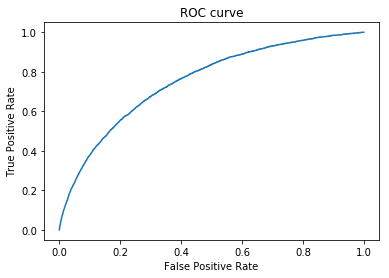

In [8]:
# lightgbmで学習してみる
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('train TARGET: 0 : 1 = %d : %d'%(len(y_train[y_train==0]), len(y_train[y_train==1])))

# 訓練データをランダムオーバーサンプリング
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_sample(X_train, y_train)
print('resampled train TARGET: 0 : 1 = %d : %d'%(len(y_train_resampled[y_train_resampled==0]), len(y_train_resampled[y_train_resampled==1])))

# GBMで学習
X_train_tr, X_train_val, y_train_tr, y_train_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=0)

gbm = lgb.LGBMClassifier(objective='binary', num_leaves=7, n_estimators=100, random_state=0)
gbm.fit(X_train_tr, y_train_tr, eval_set=(X_train_val, y_train_val), eval_metric='auc', early_stopping_rounds=10)

# 評価
import prediction_roc_curve
prediction_roc_curve.predict(gbm, X_test, y_test)